# Task monitoring

The task_monitoring library provides real-time monitoring assoicated with radical-pilot and radical-entk by mapping `RP_TASK_NAME` annotation to process.
 
The current development is here: https://github.com/lee212/task_monitoring

In [49]:
import json
import glob
import os
import pandas as pd
import numpy as np
import time

In [50]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, ylabel='Utilization', figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
        #print(data)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('time series')
    plt.ylabel(ylabel)
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [51]:
os.chdir('/home/hrlee/git/lee212/task_monitoring')
import importlib
import aggregate
importlib.reload(aggregate)

<module 'aggregate' from '/home/hrlee/git/lee212/task_monitoring/aggregate.py'>

## File-based data loader

Monitoring agent collects system/process information in a file, and the client library loads the data into pandas DataFrame and python dictionary for further processing. `JSON` is used to store the system data.

In [52]:
mon_data = aggregate.Aggregator('/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/')

/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/process_h15n18_hrlee_1614572742.524036.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/process_h15n18_hrlee_1614573316.3030121.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/process_h15n18_hrlee_1614573760.2630646.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/process_h15n18_hrlee_1614574902.3718743.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/process_h15n18_hrlee_1614573153.223773.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/system_h15n18_hrlee_1614573487.5945978.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/process_h15n18_hrlee_1614572781.2189226.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/process_h15n18_hrlee_1614575019.9118154.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/system_h15n18_hrlee_1614574322.8716002.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_1hr/system_h15n18_hrl

## CPU usage

Traditional monitoring is available like CPU times in the library. It uses python psutil to collect specific metrics e.g., cpu cpu times, or cpu load average. For the multiple node jobs, the single plot provides overall usage by calculating average values. 

In [53]:
sys_infos = mon_data.collect_systems_cpu_by_getloadavg()
sys_infos_cpu_times_percent = mon_data.collect_systems_cpy_by_cpu_times_percent()

<AxesSubplot:title={'center':'h15n18'}>

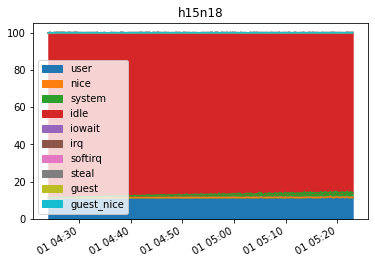

In [54]:
df_cpu_times_percent = mon_data.cpu_times_percent_to_dataframe(sys_infos_cpu_times_percent)
df_cpu_times_percent.plot.area(title=list(sys_infos_cpu_times_percent.keys())[0])

In [55]:
df_cpu_times_percent

,user,nice,system,idle,iowait,irq,softirq,steal,guest,guest_nice
2021-03-01 04:38:00,11.50,0.0,0.8,87.80,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01 04:52:00,11.50,0.0,1.5,87.00,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01 04:55:10,11.65,0.0,1.6,86.75,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01 04:46:30,11.60,0.0,1.5,87.00,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01 04:46:20,11.50,0.0,1.3,87.10,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-03-01 05:08:20,11.70,0.0,1.7,86.60,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01 05:10:40,11.70,0.0,2.4,86.00,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01 05:12:20,11.60,0.0,2.0,86.40,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-01 05:02:30,11.80,0.0,1.9,86.30,0.0,0.0,0.0,0.0,0.0,0.0


## GPU device info from NVIDIA nvml library
task_monitoring library uses NVIDIA library to collect device usage information, such as product name, memory utilization and process information assigned to devices.

In [23]:
mon_data_gpus = aggregate.Aggregator('/home/hrlee/git/lee212/task_monitoring/gpu_test/')
device_infos = mon_data_gpus.gpu_device_info()

/home/hrlee/git/lee212/task_monitoring/gpu_test/system_h29n15_hrlee_1615692169.4147372.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/process_h29n15_hrlee_1615692045.2136087.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/system_h29n15_hrlee_1615692161.662594.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/process_h29n15_hrlee_1615692177.1598659.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/system_h29n15_hrlee_1615692037.461919.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/process_h29n15_hrlee_1615692200.4666965.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/system_h29n15_hrlee_1615692231.5861967.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/system_h29n15_hrlee_1615692014.1960318.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/process_h29n15_hrlee_1615692146.1114645.json loaded.
/home/hrlee/git/lee212/task_monitoring/gpu_test/process_h29n15_hrlee_1615692115.0631607.json loade

### Example: GPU Memory usage on NAMD-EnTK


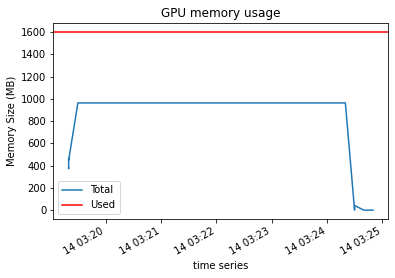

In [47]:
device_infos['date'] = pd.to_datetime(device_infos['date'], unit='s', origin='unix')
tmp = device_infos.set_index('date')
device_infos_sorted = tmp.sort_index(ascending=True)
device_infos_sorted['fb_memory_used'] = device_infos_sorted['fb_memory_usage_total'] - device_infos_sorted['fb_memory_usage_free']   
device_infos_sorted['fb_memory_used_mb'] = device_infos_sorted['fb_memory_used'] / (1000**2)
fig, axes = plt.subplots(nrows=1, ncols=1)
device_infos_sorted.plot(y='fb_memory_used_mb', ax=axes, legend=False)
plt.axhline(y=1600, color='r', linestyle='-')
axes.legend(["Total", "Used"])
axes.set_title('GPU memory usage')
axes.set_ylabel('Memory Size (MB)')
axes.set_xlabel('time series')
plt.show()

### Example: Multi nodes

Data from each node are merged and the average value is displayed in a single plot. This will provide overview of job utilization regarding CPU and memory.

In [76]:
mon_data_multi =aggregate.Aggregator('/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/')
sys_infos_multi = mon_data_multi.collect_systems_cpu_by_getloadavg()

/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n08_hrlee_1615261134.5674324.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n09_hrlee_1615261002.7713292.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n09_hrlee_1615261079.5116665.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/system_g05n08_hrlee_1615260979.5390973.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n09_hrlee_1615261102.5247629.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n09_hrlee_1615261232.9726903.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n09_hrlee_1615261056.4927964.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n09_hrlee_1615261148.561131.json loaded.
/home/hrlee/git/lee212/task_monitoring/cpu_mem_2nodes/process_g05n08_hrlee_1615261219.8167112.json loaded.
/home/hrlee/git/lee212/task_monitoring/

In [87]:
proc_infos_multi = mon_data_multi.merge_process_by_task_name()

In [88]:
df_cpu_multi = mon_data_multi.mean_cpu_percent_by_time(proc_infos_multi)
df_mem_multi = mon_data_multi.mean_memory_info_rss_by_time(proc_infos_multi)
del(df_mem_multi[''])
df_mem_multi['my cpu task'] = df_mem_multi['my cpu task']/1024/1024
df_mem_multi['my mem task'] = df_mem_multi['my mem task']/1024/1024

### Task based plot

Text(0.5, 0, 'time series')

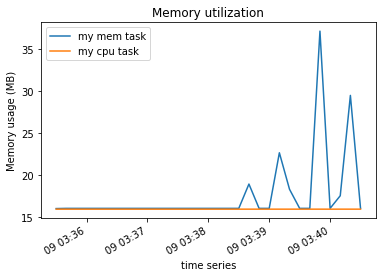

In [89]:
ax = df_mem_multi.plot()
ax.set_ylabel('Memory usage (MB)')
ax.set_title('Memory utilization')
ax.set_xlabel('time series')

In [216]:
df_mem_multi['my cpu task'] = df_mem_multi['my cpu task']/1024/1024

In [32]:
proc_infos_sys_multi = mon_data_multi.merge_process_by_name()

In [82]:
proc_infos = mon_data.merge_process_by_task_name()
df_cpu = mon_data.mean_cpu_percent_by_time(proc_infos)
df_cpu_sorted = df_cpu.sort_index(ascending=True)

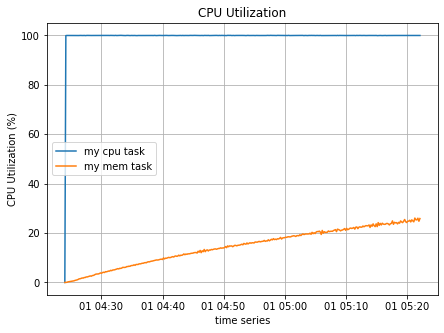

In [90]:
if '' in df_cpu_sorted:
    del(df_cpu_sorted[''])
for i in range(0, len(df_cpu_sorted), 10):
    live_plot(df_cpu_sorted.iloc[0:i],ylabel='CPU Utilization (%)', title='CPU Utilization')
    time.sleep(.1)

In [73]:
df_cpu_sys = mon_data_multi.mean_cpu_percent_by_time(proc_infos_sys_multi)
df_mem_sys = mon_data_multi.mean_memory_info_rss_by_time(proc_infos_sys_multi)
df_cpu_sys_sorted = df_cpu_sys.sort_index(ascending=True)
df_mem_sys_sorted = df_mem_sys.sort_index(ascending=True)

### Host based plot (CPU Utilization)

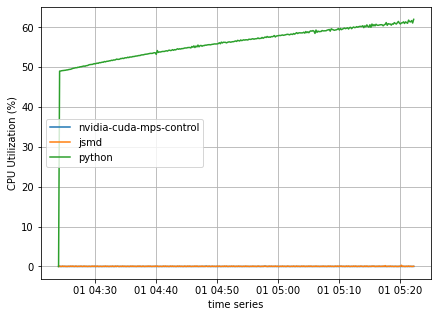

In [34]:
for i in range(0, len(df_cpu_sys_sorted), 10):
    live_plot(df_cpu_sys_sorted.iloc[0:i],ylabel="CPU Utilization (%)")
    time.sleep(1)

$$Utilization = \dfrac{\Sigma{psutil.cpu\_percent}}{total cpus}$$

In [223]:
for key in df_mem_sys_sorted.columns:
    df_mem_sys_sorted[key] = df_mem_sys_sorted[key] / 1024 / 1024

### Host baed plot (Memory usage)

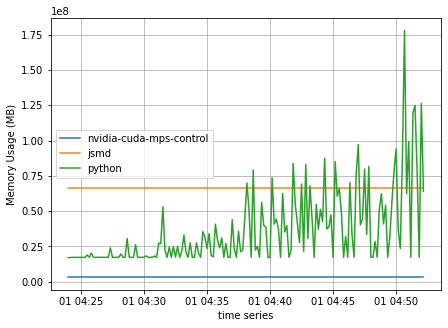

In [72]:
for i in range(0, len(df_mem_sys_sorted)//2, 10):
    live_plot(df_mem_sys_sorted.iloc[0:i],ylabel='Memory Usage (MB)')
    time.sleep(1)

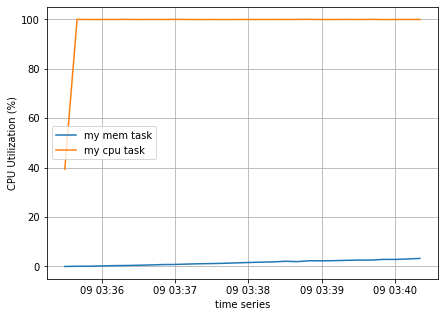

In [75]:
#del(df_cpu_sorted[''])
for i in range(0, len(df_cpu_sorted), 10):
    live_plot(df_cpu_sorted.iloc[0:i],ylabel='CPU Utilization (%)')
    time.sleep(.1)

In [40]:
df_cpu_sorted = df_cpu.sort_index(ascending=True)

In [156]:
df_mem_sorted.iloc[0:20]

,my cpu task,my mem task,
2021-03-01 04:24:00,16760832.0,16793600.0,30343168.0
2021-03-01 04:24:10,16760832.0,16813260.8,34603008.0
2021-03-01 04:24:20,16760832.0,16813260.8,36503552.0
2021-03-01 04:24:30,16760832.0,16813260.8,36831232.0
2021-03-01 04:24:40,16760832.0,16813260.8,36831232.0
2021-03-01 04:24:50,16760832.0,16813260.8,36831232.0
2021-03-01 04:25:00,16760832.0,16813260.8,37355520.0
2021-03-01 04:25:10,16760832.0,16813260.8,38273024.0
2021-03-01 04:25:20,16760832.0,16813260.8,38666240.0
2021-03-01 04:25:30,16760832.0,20270284.8,38666240.0


In [38]:
df_mem_sorted = df_mem.sort_index(ascending=True)

In [59]:
del(df_cpu[''])

<AxesSubplot:>

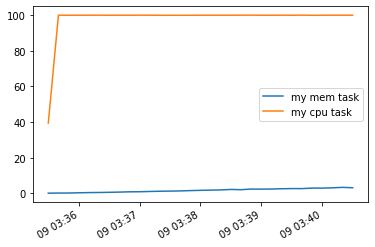

In [60]:
df_cpu.plot()